In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


### **Importing face mask dataset**

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

 1.jpg	 face-mask-dataset.zip	'WhatsApp Image 2025-01-28 at 10.48.05_910dab47.jpg'
 data	 sample_data


**Importing dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2388.jpg', 'with_mask_296.jpg', 'with_mask_3450.jpg', 'with_mask_2813.jpg', 'with_mask_240.jpg']
['with_mask_671.jpg', 'with_mask_3483.jpg', 'with_mask_3601.jpg', 'with_mask_3042.jpg', 'with_mask_509.jpg']


In [8]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1938.jpg', 'without_mask_349.jpg', 'without_mask_1961.jpg', 'without_mask_432.jpg', 'without_mask_1432.jpg']
['without_mask_3709.jpg', 'without_mask_2022.jpg', 'without_mask_2774.jpg', 'without_mask_1685.jpg', 'without_mask_3167.jpg']


In [9]:
print('Number of images with mask:',len(with_mask_files))
print('Number of images without mask:',len(without_mask_files))

Number of images with mask: 3725
Number of images without mask: 3828


**creating labels for two class of images**

In [10]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**displaying images**

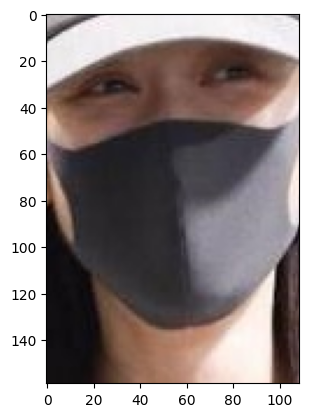

In [13]:
img=mpimg.imread('/content/data/with_mask/with_mask_1007.jpg')
imgplot=plt.imshow(img)
plt.show()

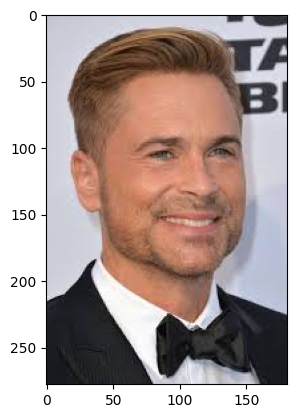

In [14]:
img=mpimg.imread('/content/data/without_mask/without_mask_1028.jpg')
imgplot=plt.imshow(img)
plt.show()

**image processing**

In [15]:
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:

  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)


without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:


  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [247, 247, 247],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [218, 218, 218]],

       [[254, 254, 254],
        [253, 253, 253],
        [239, 239, 239],
        ...,
        [216, 216, 216],
        [216, 216, 216],
        [217, 217, 217]],

       [[253, 253, 253],
        [250, 250, 250],
        [232, 232, 232],
        ...,
        [215, 215, 215],
        [215, 215, 215],
        [216, 216, 216]]], dtype=uint8)
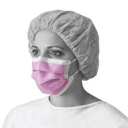

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
x=np.array(data)
y=np.array(labels)

In [22]:
type(x)

numpy.ndarray

In [23]:
type(y)

numpy.ndarray

In [24]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(y)

[1 1 1 ... 0 0 0]


**train test split**

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [29]:
x_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

**building a cnn**

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [33]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - acc: 0.6076 - loss: 0.9509 - val_acc: 0.8744 - val_loss: 0.3145
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8746 - loss: 0.3277 - val_acc: 0.8876 - val_loss: 0.2661
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9022 - loss: 0.2466 - val_acc: 0.8893 - val_loss: 0.2756
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9089 - loss: 0.2270 - val_acc: 0.9058 - val_loss: 0.2453
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - acc: 0.9275 - loss: 0.1753 - val_acc: 0.9174 - val_loss: 0.2221


**model evaluation**

In [34]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('Test Accuracy =',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - acc: 0.9170 - loss: 0.2190
Test Accuracy = 0.9225678443908691


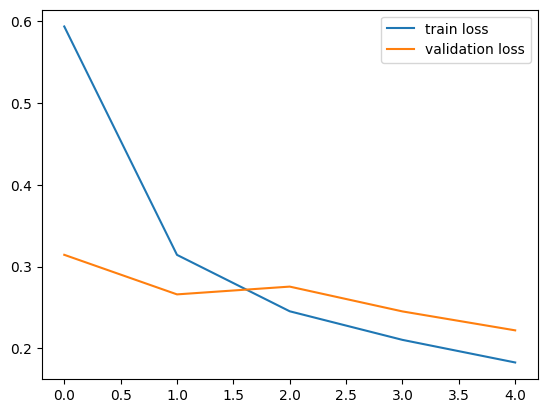

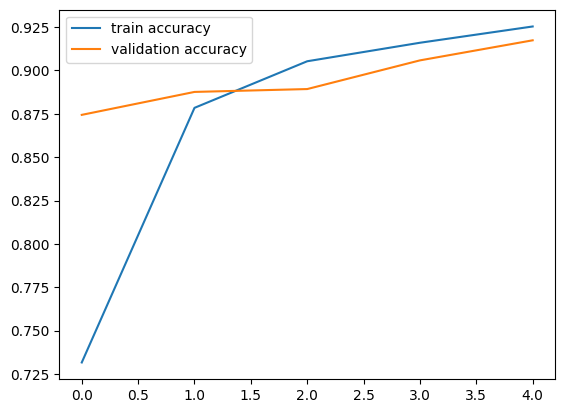

In [35]:
h=history
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()



**predictive system**

In [ ]:
input_image_path=input('path of the image to be predicted: ')

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized=cv2.resize(input_image,(128,128))

input_image_scaled=input_image_resized/255.0

input_image_reshaped=np.reshape(input_image_scaled, [1,128,128,3])

input_prediction=model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('The person in the image is wearing a mask')                                #with mask 10,100,1000

else:

  print('The person in the image is not wearing a mask')                             #without mask 100